In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-police-shootings/shootings.csv


In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv("../input/us-police-shootings/shootings.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [5]:
df.shape

(4895, 15)

In [6]:
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [7]:
df['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Industry', 'Paso Robles',
       'Crown Point'], dtype=object)

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64


<Axes: title={'center': 'Shootings by Race'}, xlabel='Race', ylabel='Count'>

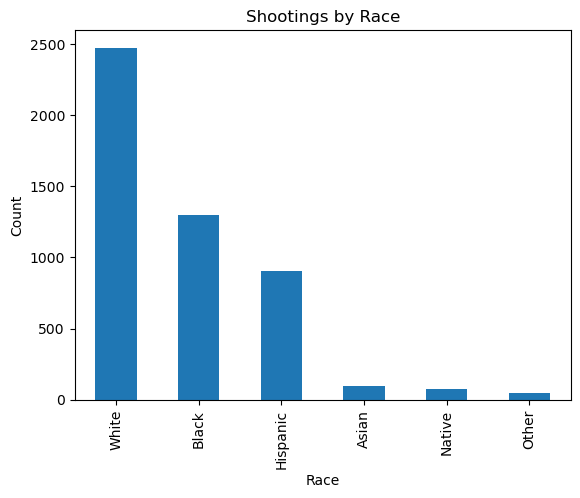

In [8]:
#dataset seems really fine so go ahead with first problem
#Investigate the demographics of victims to analyze if there are any disparities 
#in the number of shootings based on race, age, or gender."
df_race_counts = df['race'].value_counts()
print(df_race_counts)
df_race_counts.plot(kind= 'bar',xlabel='Race', ylabel='Count', title='Shootings by Race')


race
Asian       36.561676
Black       32.549946
Hispanic    33.683847
Native      31.732281
Other       33.064957
White       39.909488
Name: age, dtype: float64


<Axes: title={'center': 'Average Age by Race'}, xlabel='Race', ylabel='Average Age'>

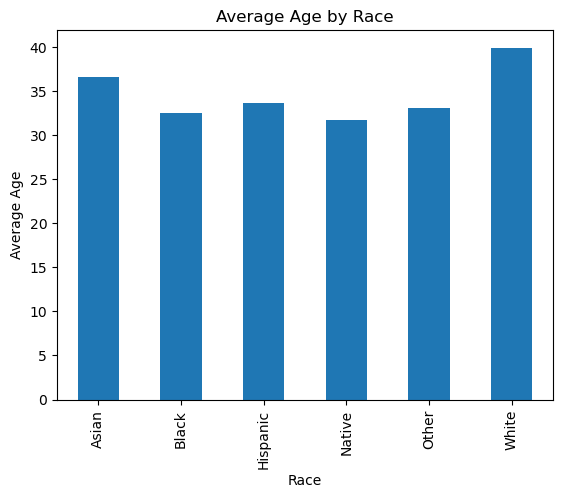

In [9]:
df_race_age_avg = df.groupby('race')['age'].mean()
print(df_race_age_avg)
df_race_age_avg.plot(kind='bar', xlabel='Race', ylabel='Average Age', title='Average Age by Race')


In [10]:
df_gender_counts = df['gender'].value_counts()
print(df_gender_counts)

M    4673
F     222
Name: gender, dtype: int64


In [11]:
age_groups = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '31-45', '46-60', '60+'])
age_group_counts = age_groups.value_counts()
print(age_group_counts)

31-45    1968
18-30    1598
46-60     903
60+       236
<18       190
Name: age, dtype: int64


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.set_index('date', inplace=True)

In [14]:
shootings_by_year = df['id'].resample('Y').count()
shootings_by_month = df['id'].resample('M').count()
shootings_by_weekday = df['id'].groupby(df.index.weekday).count()


<Axes: title={'center': 'Shootings by Year'}, xlabel='Year', ylabel='Frequency'>

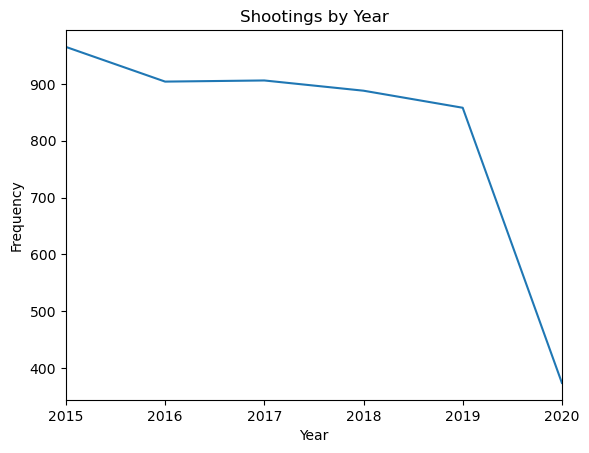

In [15]:
shootings_by_year.plot(kind='line', xlabel='Year', ylabel='Frequency', title='Shootings by Year')

<Axes: title={'center': 'Shootings by Month'}, xlabel='Month', ylabel='Frequency'>

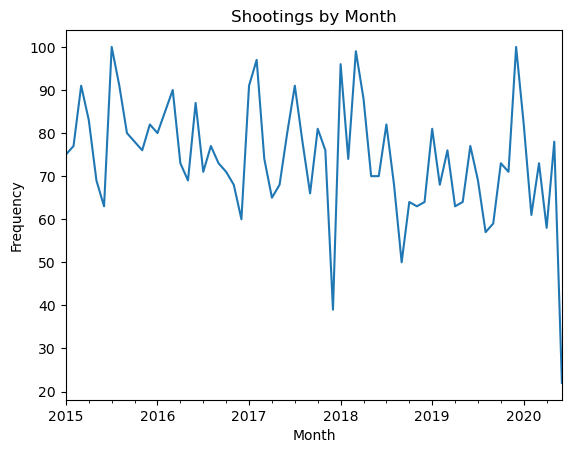

In [16]:
shootings_by_month.plot(kind='line', xlabel='Month', ylabel='Frequency', title='Shootings by Month')

<Axes: title={'center': 'Shootings by Weekday'}, xlabel='Weekday', ylabel='Frequency'>

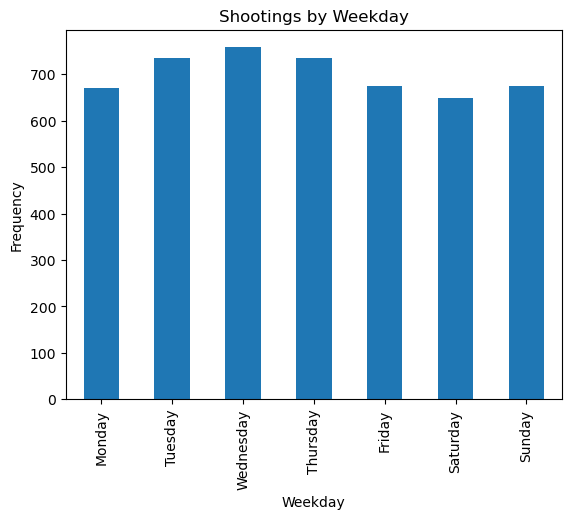

In [17]:
shootings_by_weekday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

shootings_by_weekday.plot(kind='bar', xlabel='Weekday', ylabel='Frequency', title='Shootings by Weekday')

In [18]:
#Investigate the spatial distribution of police shootings to 
#identify regions or cities with higher incidents.
df_cities_count  = df['city'].value_counts()


In [19]:

df_states_count = df['state'].value_counts()
print(df_states_count)

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
NJ     60
MN     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
MT     29
HI     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: state, dtype: int64


<Axes: title={'center': 'Top 10 Cities with Highest Shootings'}, xlabel='City', ylabel='Count'>

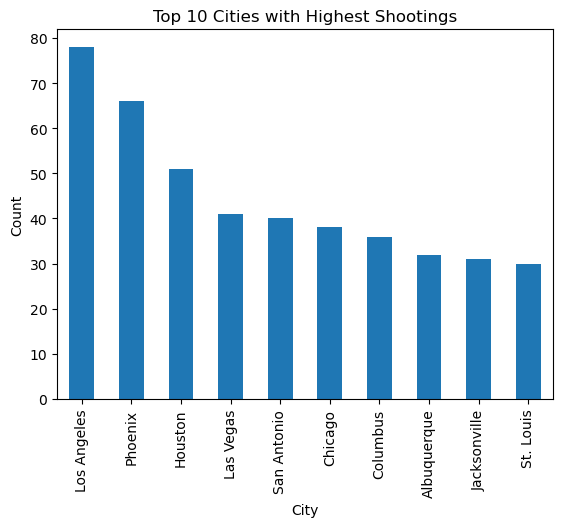

In [20]:
df_cities_count.head(10).plot(kind='bar', xlabel='City', ylabel='Count', title='Top 10 Cities with Highest Shootings')


<Axes: title={'center': 'Top 10 Cities with Highest Shootings'}, xlabel='City', ylabel='Count'>

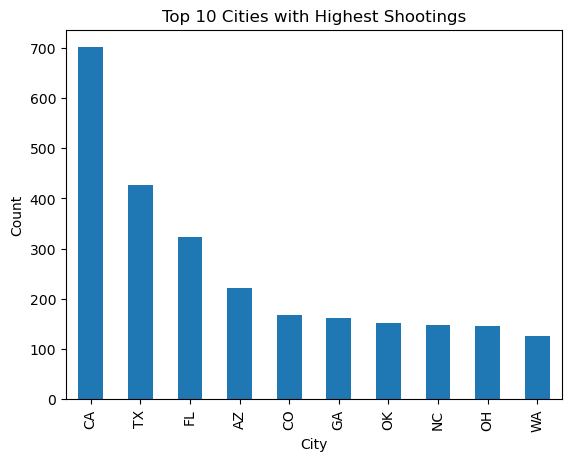

In [21]:
df_states_count.head(10).plot(kind='bar', xlabel='City', ylabel='Count', title='Top 10 Cities with Highest Shootings')

In [22]:
df_armed=df['armed'].value_counts()
print(df_armed)

gun                    2755
knife                   708
unknown                 418
unarmed                 348
toy weapon              171
                       ... 
metal rake                1
oar                       1
machete and gun           1
air conditioner           1
car, knife and mace       1
Name: armed, Length: 89, dtype: int64


<Axes: title={'center': 'Top 10 armed weapons for victim'}, xlabel='Armed', ylabel='Frequency'>

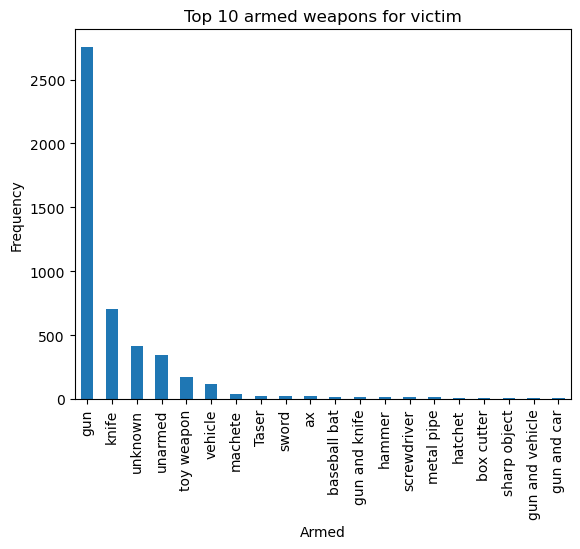

In [23]:
df_armed.head(20).plot(kind='bar',xlabel='Armed', ylabel='Frequency', title='Top 10 armed weapons for victim')